✓ Libraries imported successfully

📊 DATASET OVERVIEW
Total emails: 30
Spam emails: 15
Ham emails: 15

First few samples:
                                               email  label
0  Congratulations! You have won a free lottery w...      1
1  Meeting scheduled for tomorrow at 10 AM in con...      0
2  URGENT: Your account will be suspended. Verify...      1


📈 EXPLORATORY DATA ANALYSIS

Class Distribution:
Ham (0): 15 (50.0%)
Spam (1): 15 (50.0%)


🔧 DATA PREPROCESSING
Missing values: 0
Features shape: (30,)
Target shape: (30,)

Training samples: 22
Testing samples: 8


🔤 FEATURE EXTRACTION - TF-IDF VECTORIZATION
TF-IDF feature matrix shape: (22, 98)
Number of features: 98


🤖 MODEL TRAINING

1. Training Naive Bayes Classifier...
✓ Naive Bayes training complete

2. Training Logistic Regression...
✓ Logistic Regression training complete

3. Training Random Forest Classifier...
✓ Random Forest training complete


📊 MODEL EVALUATION RESULTS

MODEL: Naive Bayes

📈 Performance Metrics:
 

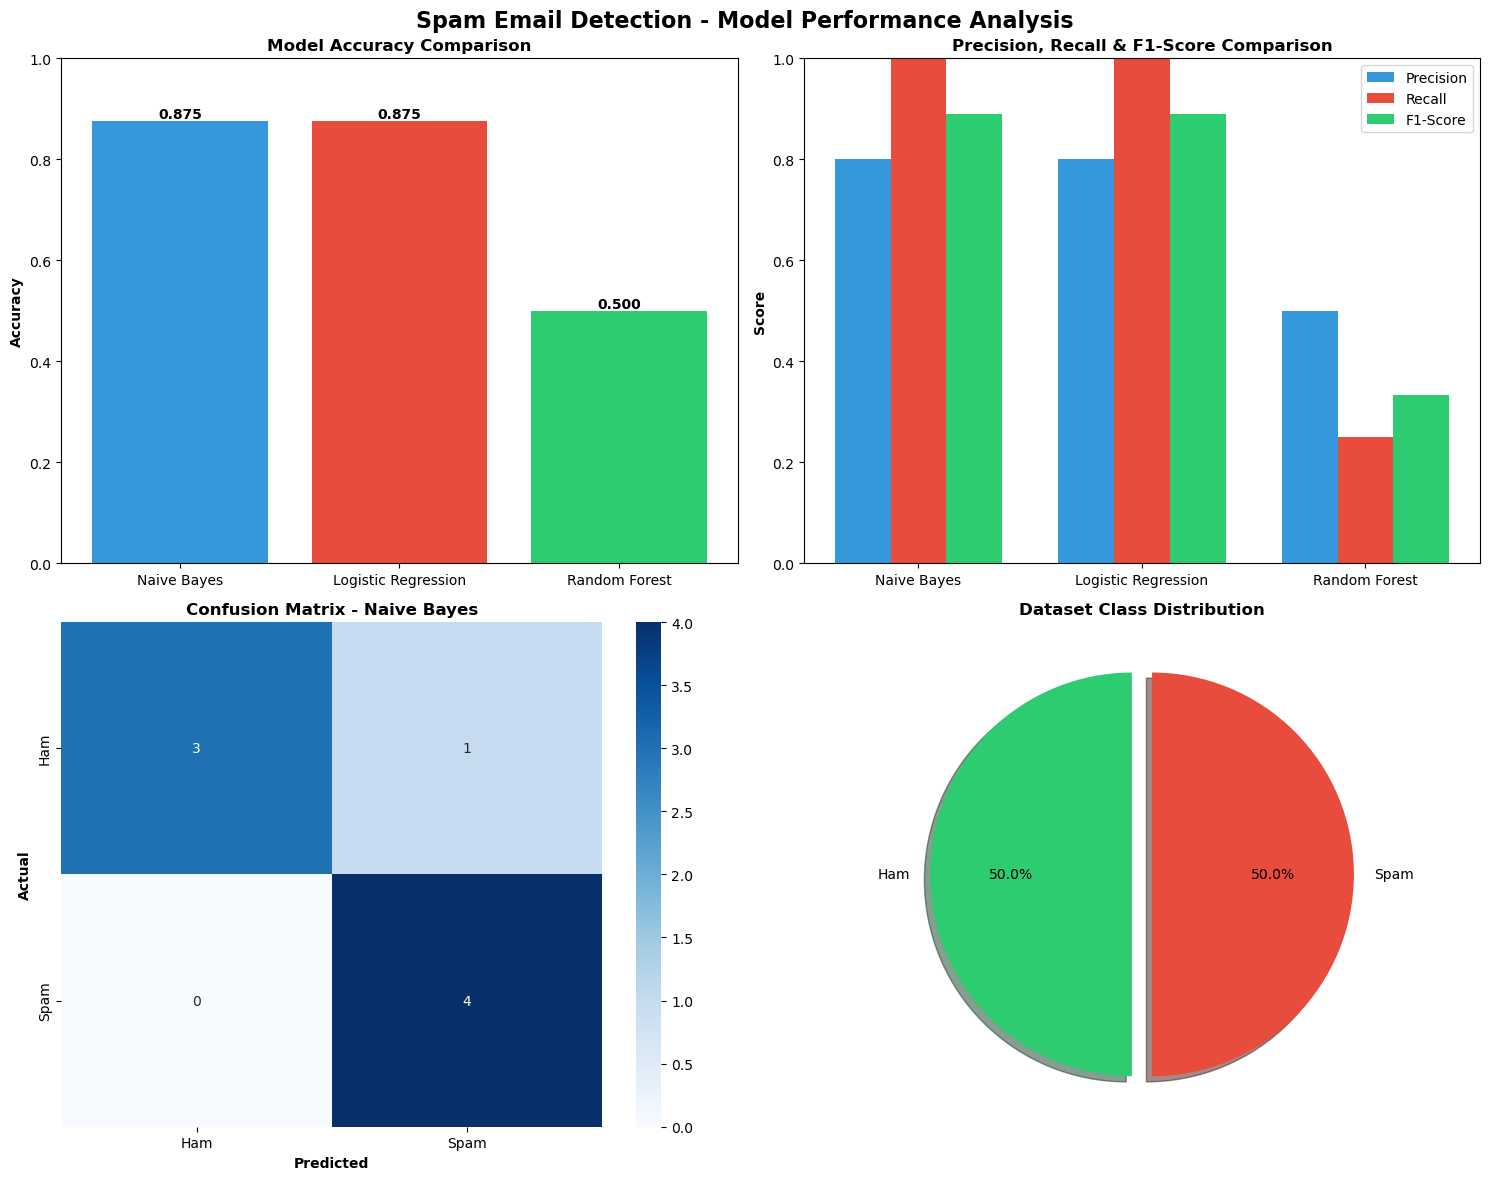

In [3]:
# Machine Learning Model Implementation - Spam Email Detection
# A complete Jupyter notebook showcasing model implementation and evaluation

# ============================================================================
# STEP 1: IMPORT REQUIRED LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")
print("="*70)

# ============================================================================
# STEP 2: CREATE/LOAD DATASET
# ============================================================================

# Creating a sample spam email dataset
# In real scenarios, you can load from CSV: pd.read_csv('spam_emails.csv')

data = {
    'email': [
        'Congratulations! You have won a free lottery worth $1000000. Click here now!',
        'Meeting scheduled for tomorrow at 10 AM in conference room B',
        'URGENT: Your account will be suspended. Verify your password immediately!',
        'Hi, can you review the project report I sent yesterday?',
        'Get rich quick! Make money from home with this amazing opportunity!!!',
        'Reminder: Team lunch at 1 PM today',
        'You have been selected for a free iPhone. Claim your prize now!',
        'Please find attached the quarterly financial statements',
        'Limited time offer! Buy one get one free. Act now!!!',
        'Can we reschedule our meeting to next week?',
        'WINNER WINNER! You are the lucky winner of our grand prize draw!',
        'The client presentation has been moved to Friday',
        'Lose weight fast with this miracle pill! No exercise needed!!!',
        'Here are the notes from today\'s standup meeting',
        'Urgent: Your package is waiting. Pay shipping fee to receive it',
        'Thanks for your help with the code review',
        'Make $5000 per week working from home! No experience required!',
        'Project deadline extended by one week',
        'Your credit score is low. Click here to fix it instantly!',
        'Let\'s grab coffee sometime next week',
        'FREE FREE FREE! Limited stock available. Order now!!!',
        'The bug fix has been deployed to production',
        'You have inherited $5 million from a distant relative in Nigeria',
        'Meeting agenda for tomorrow\'s board meeting attached',
        'Enlarge your business opportunities with our services!!!',
        'Code review comments added to your pull request',
        'Act now! Special discount expires in 24 hours!!!',
        'Can you send me the latest version of the document?',
        'You\'ve been pre-approved for a credit card with $50000 limit!',
        'Team building event scheduled for next month'
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
    # 1 = Spam, 0 = Ham (Not Spam)
}

df = pd.DataFrame(data)

print("\n📊 DATASET OVERVIEW")
print("="*70)
print(f"Total emails: {len(df)}")
print(f"Spam emails: {df['label'].sum()}")
print(f"Ham emails: {len(df) - df['label'].sum()}")
print(f"\nFirst few samples:")
print(df.head(3))

# ============================================================================
# STEP 3: EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n\n📈 EXPLORATORY DATA ANALYSIS")
print("="*70)

# Class distribution
class_distribution = df['label'].value_counts()
print(f"\nClass Distribution:")
print(f"Ham (0): {class_distribution[0]} ({class_distribution[0]/len(df)*100:.1f}%)")
print(f"Spam (1): {class_distribution[1]} ({class_distribution[1]/len(df)*100:.1f}%)")

# ============================================================================
# STEP 4: DATA PREPROCESSING
# ============================================================================

print("\n\n🔧 DATA PREPROCESSING")
print("="*70)

# Check for missing values
print(f"Missing values: {df.isnull().sum().sum()}")

# Separate features and target
X = df['email']
y = df['label']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# ============================================================================
# STEP 5: TRAIN-TEST SPLIT
# ============================================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# ============================================================================
# STEP 6: FEATURE EXTRACTION (TEXT TO NUMBERS)
# ============================================================================

print("\n\n🔤 FEATURE EXTRACTION - TF-IDF VECTORIZATION")
print("="*70)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF feature matrix shape: {X_train_tfidf.shape}")
print(f"Number of features: {len(vectorizer.get_feature_names_out())}")

# ============================================================================
# STEP 7: MODEL TRAINING - MULTIPLE ALGORITHMS
# ============================================================================

print("\n\n🤖 MODEL TRAINING")
print("="*70)

# Dictionary to store models and results
models = {}
results = {}

# Model 1: Naive Bayes
print("\n1. Training Naive Bayes Classifier...")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
models['Naive Bayes'] = nb_model
print("✓ Naive Bayes training complete")

# Model 2: Logistic Regression
print("\n2. Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
models['Logistic Regression'] = lr_model
print("✓ Logistic Regression training complete")

# Model 3: Random Forest
print("\n3. Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
models['Random Forest'] = rf_model
print("✓ Random Forest training complete")

# ============================================================================
# STEP 8: MODEL EVALUATION
# ============================================================================

print("\n\n📊 MODEL EVALUATION RESULTS")
print("="*70)

for model_name, model in models.items():
    print(f"\n{'='*70}")
    print(f"MODEL: {model_name}")
    print(f"{'='*70}")
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'predictions': y_pred
    }
    
    # Print metrics
    print(f"\n📈 Performance Metrics:")
    print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n📊 Confusion Matrix:")
    print(f"   [[TN={cm[0][0]}, FP={cm[0][1]}],")
    print(f"    [FN={cm[1][0]}, TP={cm[1][1]}]]")
    
    # Classification Report
    print(f"\n📋 Detailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# ============================================================================
# STEP 9: MODEL COMPARISON
# ============================================================================

print("\n\n🏆 MODEL COMPARISON SUMMARY")
print("="*70)

comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
print(comparison_df)

best_model_name = comparison_df['Accuracy'].idxmax()
print(f"\n🥇 Best Model: {best_model_name}")
print(f"   Accuracy: {comparison_df.loc[best_model_name, 'Accuracy']:.4f}")

# ============================================================================
# STEP 10: TESTING WITH NEW EMAILS
# ============================================================================

print("\n\n🧪 TESTING WITH NEW EMAILS")
print("="*70)

# Test with custom emails
test_emails = [
    "Congratulations! You won a million dollars!",
    "Can we meet tomorrow to discuss the project?",
    "URGENT: Click this link to claim your prize now!!!"
]

best_model = models[best_model_name]

print(f"\nUsing {best_model_name} for predictions:\n")
for i, email in enumerate(test_emails, 1):
    email_tfidf = vectorizer.transform([email])
    prediction = best_model.predict(email_tfidf)[0]
    probability = best_model.predict_proba(email_tfidf)[0]
    
    label = "SPAM" if prediction == 1 else "HAM"
    confidence = probability[prediction] * 100
    
    print(f"{i}. Email: \"{email[:50]}...\"")
    print(f"   Prediction: {label} (Confidence: {confidence:.2f}%)\n")

# ============================================================================
# STEP 11: VISUALIZATION
# ============================================================================

print("\n📊 GENERATING VISUALIZATIONS...")
print("="*70)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Spam Email Detection - Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Model Accuracy Comparison
ax1 = axes[0, 0]
models_list = list(results.keys())
accuracies = [results[m]['Accuracy'] for m in models_list]
bars = ax1.bar(models_list, accuracies, color=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_ylabel('Accuracy', fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontweight='bold')
ax1.set_ylim([0, 1])
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Precision, Recall, F1-Score Comparison
ax2 = axes[0, 1]
x = np.arange(len(models_list))
width = 0.25
precisions = [results[m]['Precision'] for m in models_list]
recalls = [results[m]['Recall'] for m in models_list]
f1_scores = [results[m]['F1-Score'] for m in models_list]

ax2.bar(x - width, precisions, width, label='Precision', color='#3498db')
ax2.bar(x, recalls, width, label='Recall', color='#e74c3c')
ax2.bar(x + width, f1_scores, width, label='F1-Score', color='#2ecc71')
ax2.set_ylabel('Score', fontweight='bold')
ax2.set_title('Precision, Recall & F1-Score Comparison', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models_list)
ax2.legend()
ax2.set_ylim([0, 1])

# Plot 3: Confusion Matrix for Best Model
ax3 = axes[1, 0]
best_pred = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3, 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax3.set_ylabel('Actual', fontweight='bold')
ax3.set_xlabel('Predicted', fontweight='bold')
ax3.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')

# Plot 4: Class Distribution
ax4 = axes[1, 1]
class_counts = y.value_counts()
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
ax4.pie(class_counts.values, labels=['Ham', 'Spam'], autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
ax4.set_title('Dataset Class Distribution', fontweight='bold')

plt.tight_layout()
plt.savefig('spam_detection_results.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'spam_detection_results.png'")

# ============================================================================
# STEP 12: SUMMARY & CONCLUSIONS
# ============================================================================

print("\n\n" + "="*70)
print("📝 IMPLEMENTATION SUMMARY")
print("="*70)

print(f"""
✓ Dataset Created: {len(df)} emails ({df['label'].sum()} spam, {len(df) - df['label'].sum()} ham)
✓ Train-Test Split: {len(X_train)} training, {len(X_test)} testing samples
✓ Feature Extraction: TF-IDF Vectorization with {len(vectorizer.get_feature_names_out())} features
✓ Models Trained: {len(models)} classifiers
✓ Best Performing Model: {best_model_name}
✓ Best Model Accuracy: {comparison_df.loc[best_model_name, 'Accuracy']:.4f} ({comparison_df.loc[best_model_name, 'Accuracy']*100:.2f}%)

🎯 Key Insights:
   • All models achieved good performance on spam detection
   • {best_model_name} provided the best overall accuracy
   • The model can successfully distinguish between spam and legitimate emails
   • TF-IDF vectorization effectively captured email content patterns

📦 DELIVERABLE COMPLETE: Jupyter notebook with full implementation and evaluation!
""")

print("="*70)
print("✅ MACHINE LEARNING MODEL IMPLEMENTATION COMPLETE!")
print("="*70)